Question 1


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [43]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [45]:
model = Sequential([Flatten(input_shape=(28, 28)), Dense(128, activation='relu'),  Dense(64, activation='relu'),Dense(10, activation='softmax') ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\K.G.LAKSSAN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8627 - loss: 0.4621 - val_accuracy: 0.9579 - val_loss: 0.1344
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9641 - loss: 0.1174 - val_accuracy: 0.9688 - val_loss: 0.1047
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9776 - loss: 0.0741 - val_accuracy: 0.9706 - val_loss: 0.0939
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9846 - loss: 0.0522 - val_accuracy: 0.9735 - val_loss: 0.0871
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9883 - loss: 0.0387 - val_accuracy: 0.9713 - val_loss: 0.0979
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.9770 - val_loss: 0.0920
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9764 - val_loss: 0.0961
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0211 - 

In [31]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1057
Test Loss: 0.09084024280309677
Test Accuracy: 0.9747999906539917


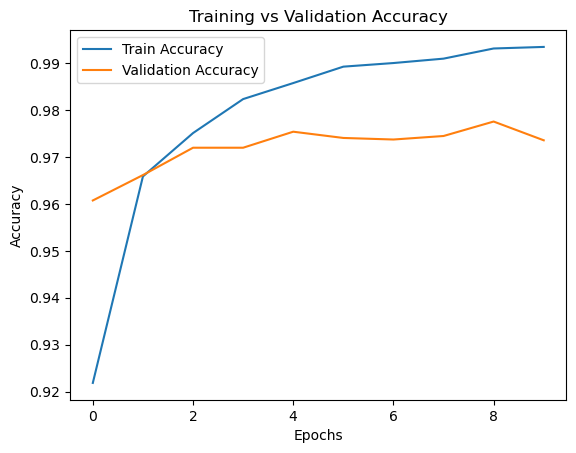

In [33]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


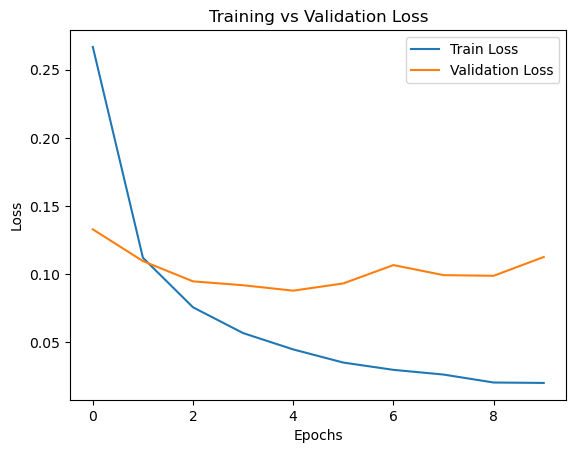

In [35]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


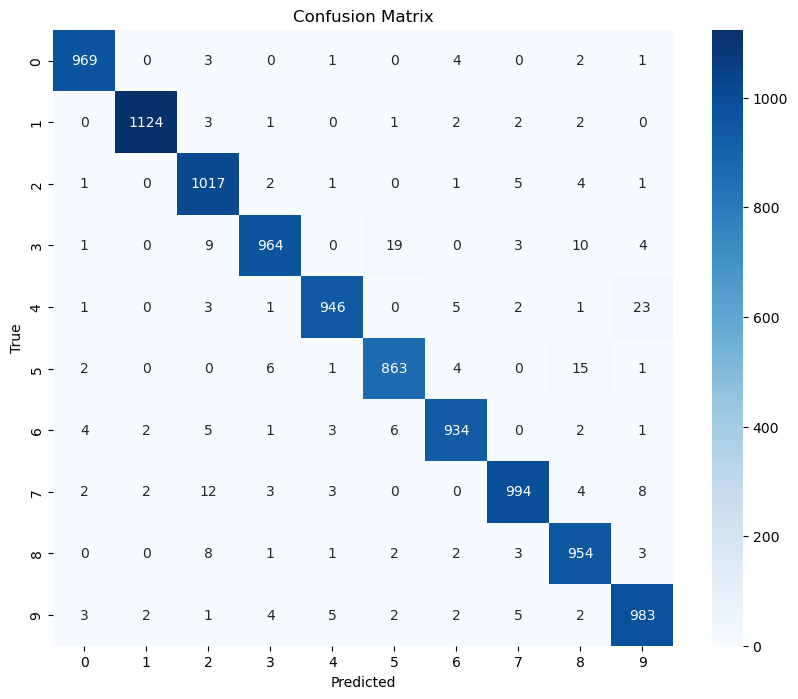

In [37]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.98      0.95      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



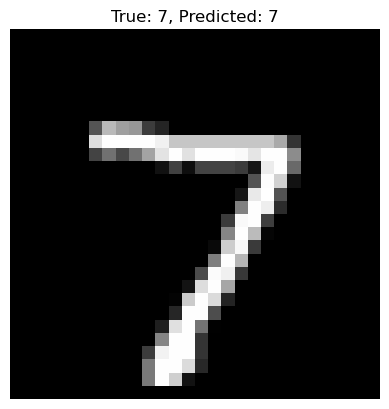

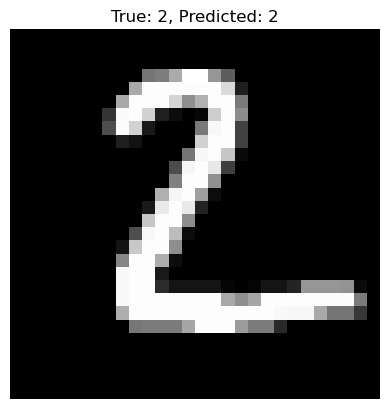

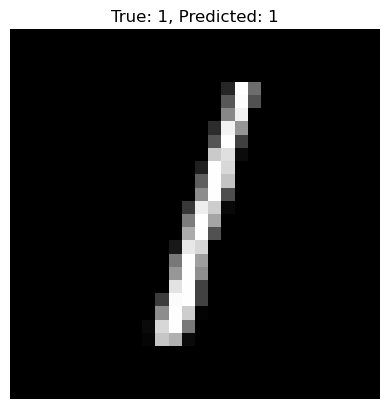

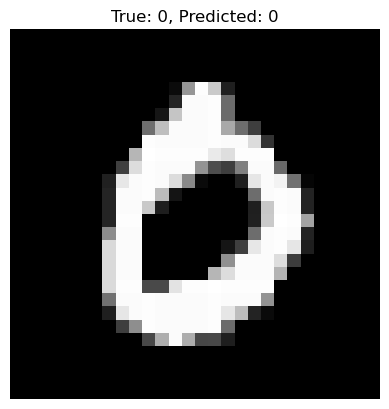

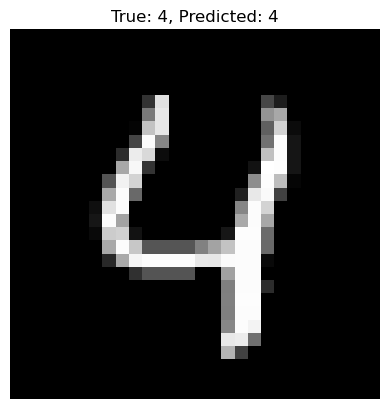

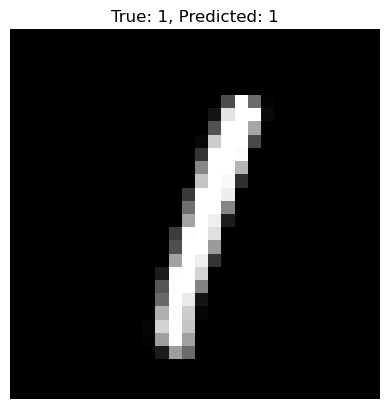

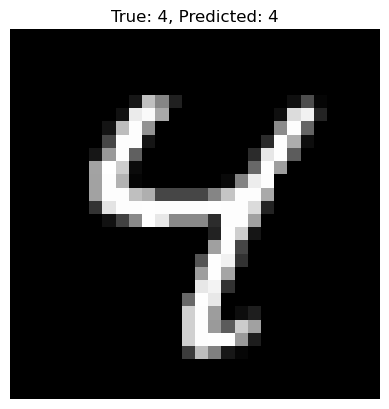

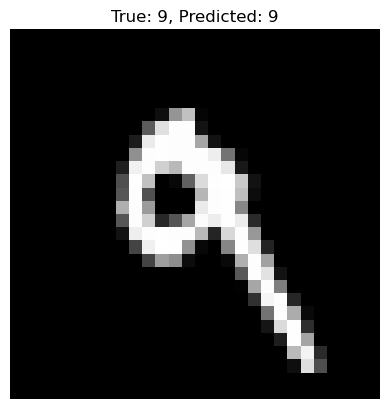

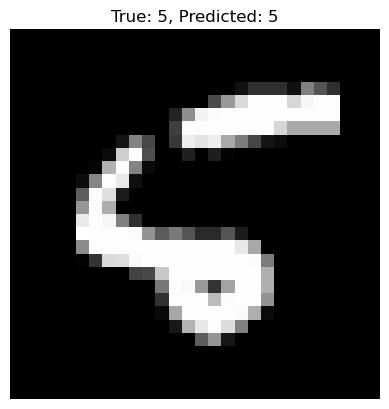

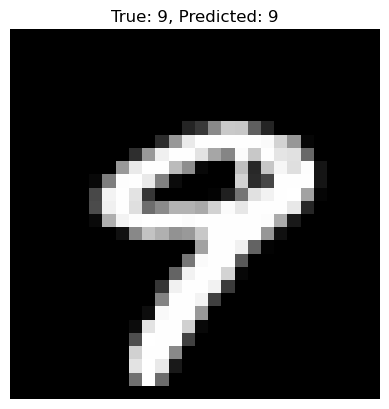

In [41]:
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {y_pred_classes[i]}")
    plt.axis('off')
    plt.show()


Question 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


In [9]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [11]:
model = Sequential([Flatten(input_shape=(32, 32, 3)),  Dense(512, activation='relu'), Dropout(0.5),Dense(256, activation='relu'),Dropout(0.5),
    Dense(10, activation='softmax') 
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64,validation_data=(x_test, y_test))


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.1539 - loss: 2.2847 - val_accuracy: 0.2207 - val_loss: 2.1467
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1836 - loss: 2.1223 - val_accuracy: 0.2525 - val_loss: 2.0345
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1985 - loss: 2.0807 - val_accuracy: 0.2895 - val_loss: 1.9987
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2087 - loss: 2.0658 - val_accuracy: 0.2530 - val_loss: 2.0161
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2135 - loss: 2.0608 - val_accuracy: 0.2744 - val_loss: 1.9895
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2095 - loss: 2.0575 - val_accuracy: 0.2717 - val_loss: 2.0026
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2152 - loss: 2.0510 - val_accuracy: 0.2431 - val_loss: 2.0059
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2227 - loss: 2.0452 - 

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2563 - loss: 2.0263
Test Accuracy: 25.51%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.56      0.10      0.16      1000
           1       0.66      0.12      0.21      1000
           2       0.00      0.00      0.00      1000
           3       0.22      0.15      0.18      1000
           4       0.29      0.27      0.28      1000
           5       0.51      0.10      0.17      1000
           6       0.27      0.56      0.37      1000
           7       0.20      0.54      0.29      1000
           8       0.39      0.03      0.06      1000
           9       0.23      0.69      0.35      1000

    accuracy                           0.26     10000
   macro avg       0.33      0.26      0.20     10000
weighted avg       0.33      0.26      0.20     10000



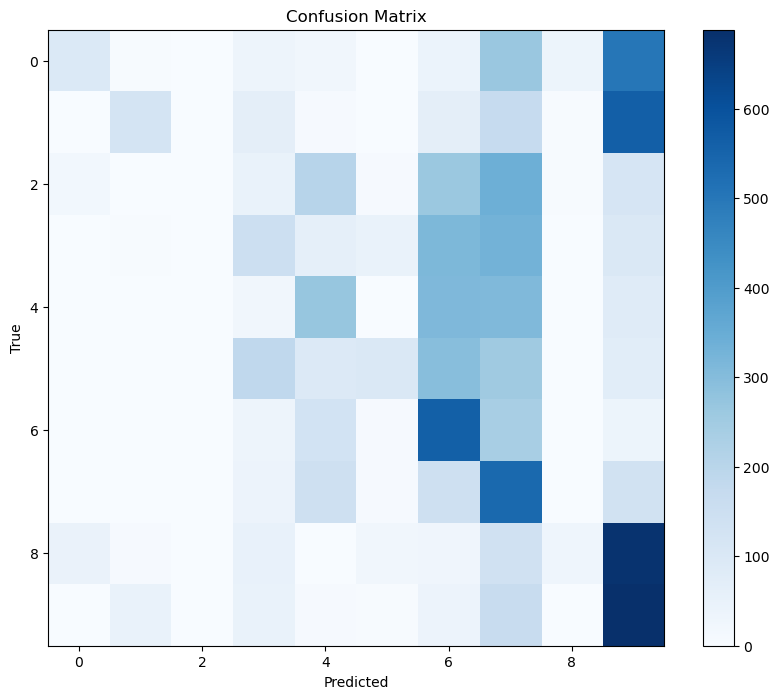

In [17]:

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


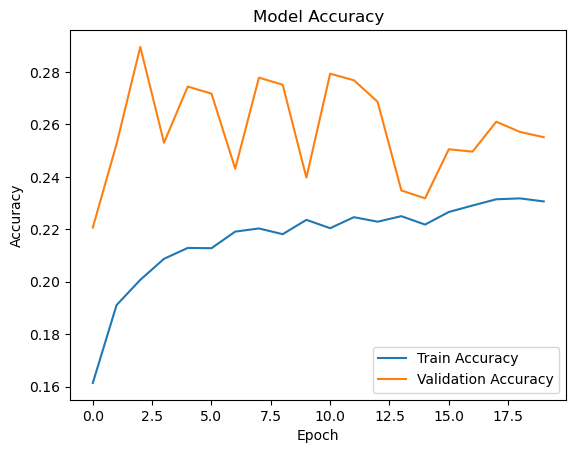

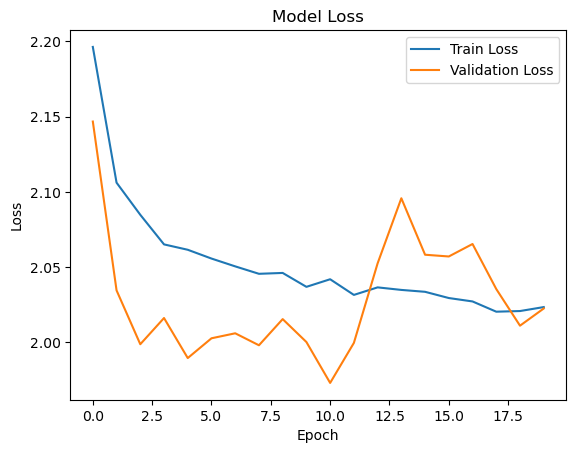

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
